# Análise dos dados

Importando bibliotecas

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Criando Sessão PySpark

In [2]:
spark = SparkSession.builder \
    .appName("Data-Analysis") \
    .getOrCreate()

**Informações sobre os dados**

**id:** Identificado único de cada transação

**V1-V28:** Colunas onónimas representando vários atributos da transação(tempo, local, etc.)

**Amount:** Quantia da transação

**Class:** Coluna Binária que representa se a transação é fraudulenta (1) ou não (0)

Lendo dataframe

In [3]:
parquet_path = "/home/jovyan/data/clean-data/creditcard_2023.parquet"

df = spark.read.parquet(parquet_path)

Convertendo para Pandas

In [4]:
df_pd = df.toPandas()

**Gerando Mapa de calor**

Esse gráfico exibe a correlação entre as variáveis do conjunto de dados, ajudando a identificar relações fortes entre atributos. Valores próximos de 1 ou -1 indicam correlações significativas, enquanto valores próximos de 0 indicam pouca relação.

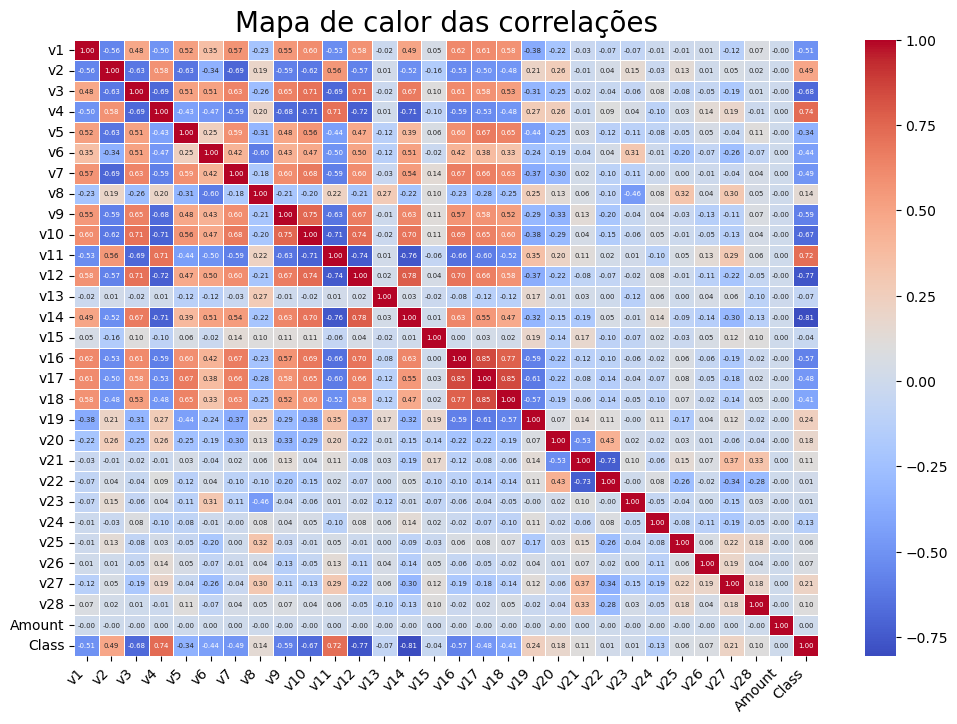

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pd.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 5})
plt.xticks(rotation=45, ha="right")
plt.title("Mapa de calor das correlações", fontsize=20)
plt.show()

**Histograma do Montante das Transações**

O histograma mostra a distribuição do valor das transações, ajudando a entender a frequência de diferentes faixas de valores. A linha KDE sobreposta auxilia na visualização da densidade dos dados.

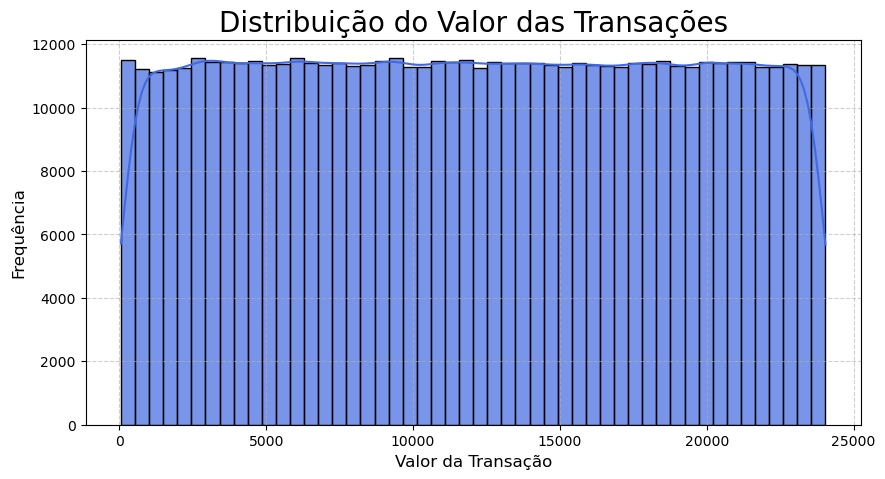

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df_pd["Amount"], bins=50, kde=True, color = "royalblue", edgecolor = "black", alpha = 0.7)
plt.xlabel("Valor da Transação", fontsize = 12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Distribuição do Valor das Transações", fontsize=20)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Boxplot para Analisar Outliers**

Esse gráfico exibe a distribuição do valor das transações para transações fraudulentas (1) e não fraudulentas (0). Ele permite visualizar a mediana, a dispersão dos dados e possíveis outliers.

/tmp/ipykernel_3030/2423464574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df_pd, showfliers=False, palette=["lightcoral", "lightblue"])


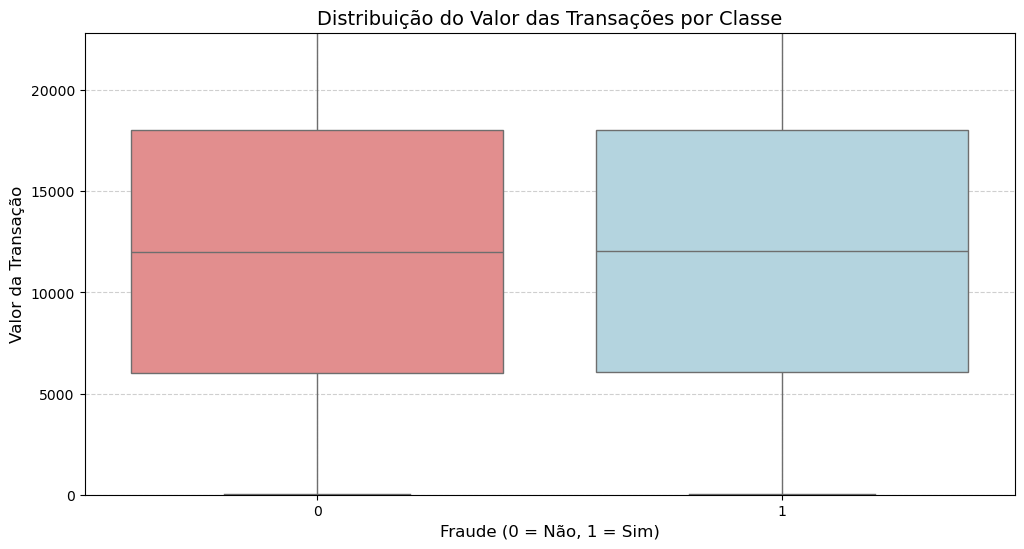

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Class", y="Amount", data=df_pd, showfliers=False, palette=["lightcoral", "lightblue"])
plt.ylim(0, df_pd["Amount"].quantile(0.95))
plt.xlabel("Fraude (0 = Não, 1 = Sim)", fontsize=12)
plt.ylabel("Valor da Transação", fontsize=12)
plt.title("Distribuição do Valor das Transações por Classe", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Gráfico de Barras - Frequência de Fraudes**

O objetivo desse gráfico é visualizar o desbalanceamento da variável Class (fraudes vs. não fraudes)



/tmp/ipykernel_3030/3148198207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df_pd, palette=["lightblue", "lightcoral"])


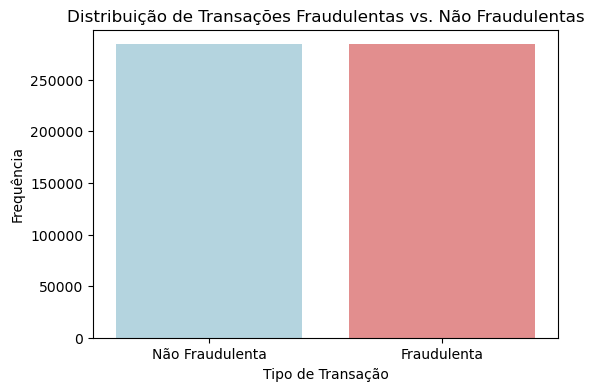

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df_pd, palette=["lightblue", "lightcoral"])
plt.xticks([0, 1], ["Não Fraudulenta", "Fraudulenta"])
plt.xlabel("Tipo de Transação")
plt.ylabel("Frequência")
plt.title("Distribuição de Transações Fraudulentas vs. Não Fraudulentas")
plt.show()


Finalizando a sessão Spark

In [9]:
spark.stop()